# Mehmet Emin Aydın

## GAIH Homework3

Generate dataset using make_classification function in the sklearn.datasets class. Generate 10000 samples with 8 features (X) with one label (y). Also, use following parameters
    n_informative = 5
    class_sep = 2
    random_state = 42
Explore and analyse raw data.
Do preprocessing for classification.
Split your dataset into train and test test (0.7 for train and 0.3 for test).
Try Decision Tree and XGBoost Algorithm with different hyperparameters. (Using GridSearchCV is a plus)
Evaluate your result on both train and test set. Analyse if there is any underfitting or overfitting problem. Make your comments.

In [3]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=10000,n_features=8, n_informative=5, class_sep= 2, random_state=42)

In [4]:
import pandas as pd

In [5]:
df = pd.DataFrame(X, columns = ["f1","f2","f3","f4","f5","f6","f7","f8"])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      10000 non-null  float64
 1   f2      10000 non-null  float64
 2   f3      10000 non-null  float64
 3   f4      10000 non-null  float64
 4   f5      10000 non-null  float64
 5   f6      10000 non-null  float64
 6   f7      10000 non-null  float64
 7   f8      10000 non-null  float64
dtypes: float64(8)
memory usage: 625.1 KB


In [7]:
df.describe()

,f1,f2,f3,f4,f5,f6,f7,f8
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,-1.004918,0.982548,0.003020,1.071892,0.995967,-1.869138,-0.001747,0.994744
std,2.125161,2.236374,1.016612,2.571314,2.161592,2.587044,2.446634,2.266276
min,-7.361942,-6.334871,-3.531879,-6.507147,-6.124101,-10.552410,-8.263252,-6.274545
25%,-2.575438,-0.418504,-0.673464,-1.196634,-0.507065,-3.750591,-1.984409,-0.594088
50%,-1.448219,1.414705,0.013764,1.182811,1.478394,-1.769049,0.215688,1.373192
75%,0.666344,2.548942,0.680873,3.296581,2.529939,0.072616,1.985890,2.617999
max,6.445003,7.784181,3.443926,8.484377,7.824402,5.853682,6.944183,7.815690


In [8]:
df.isna().sum()

f1    0
f2    0
f3    0
f4    0
f5    0
f6    0
f7    0
f8    0
dtype: int64

In [9]:
df.duplicated().sum()

0

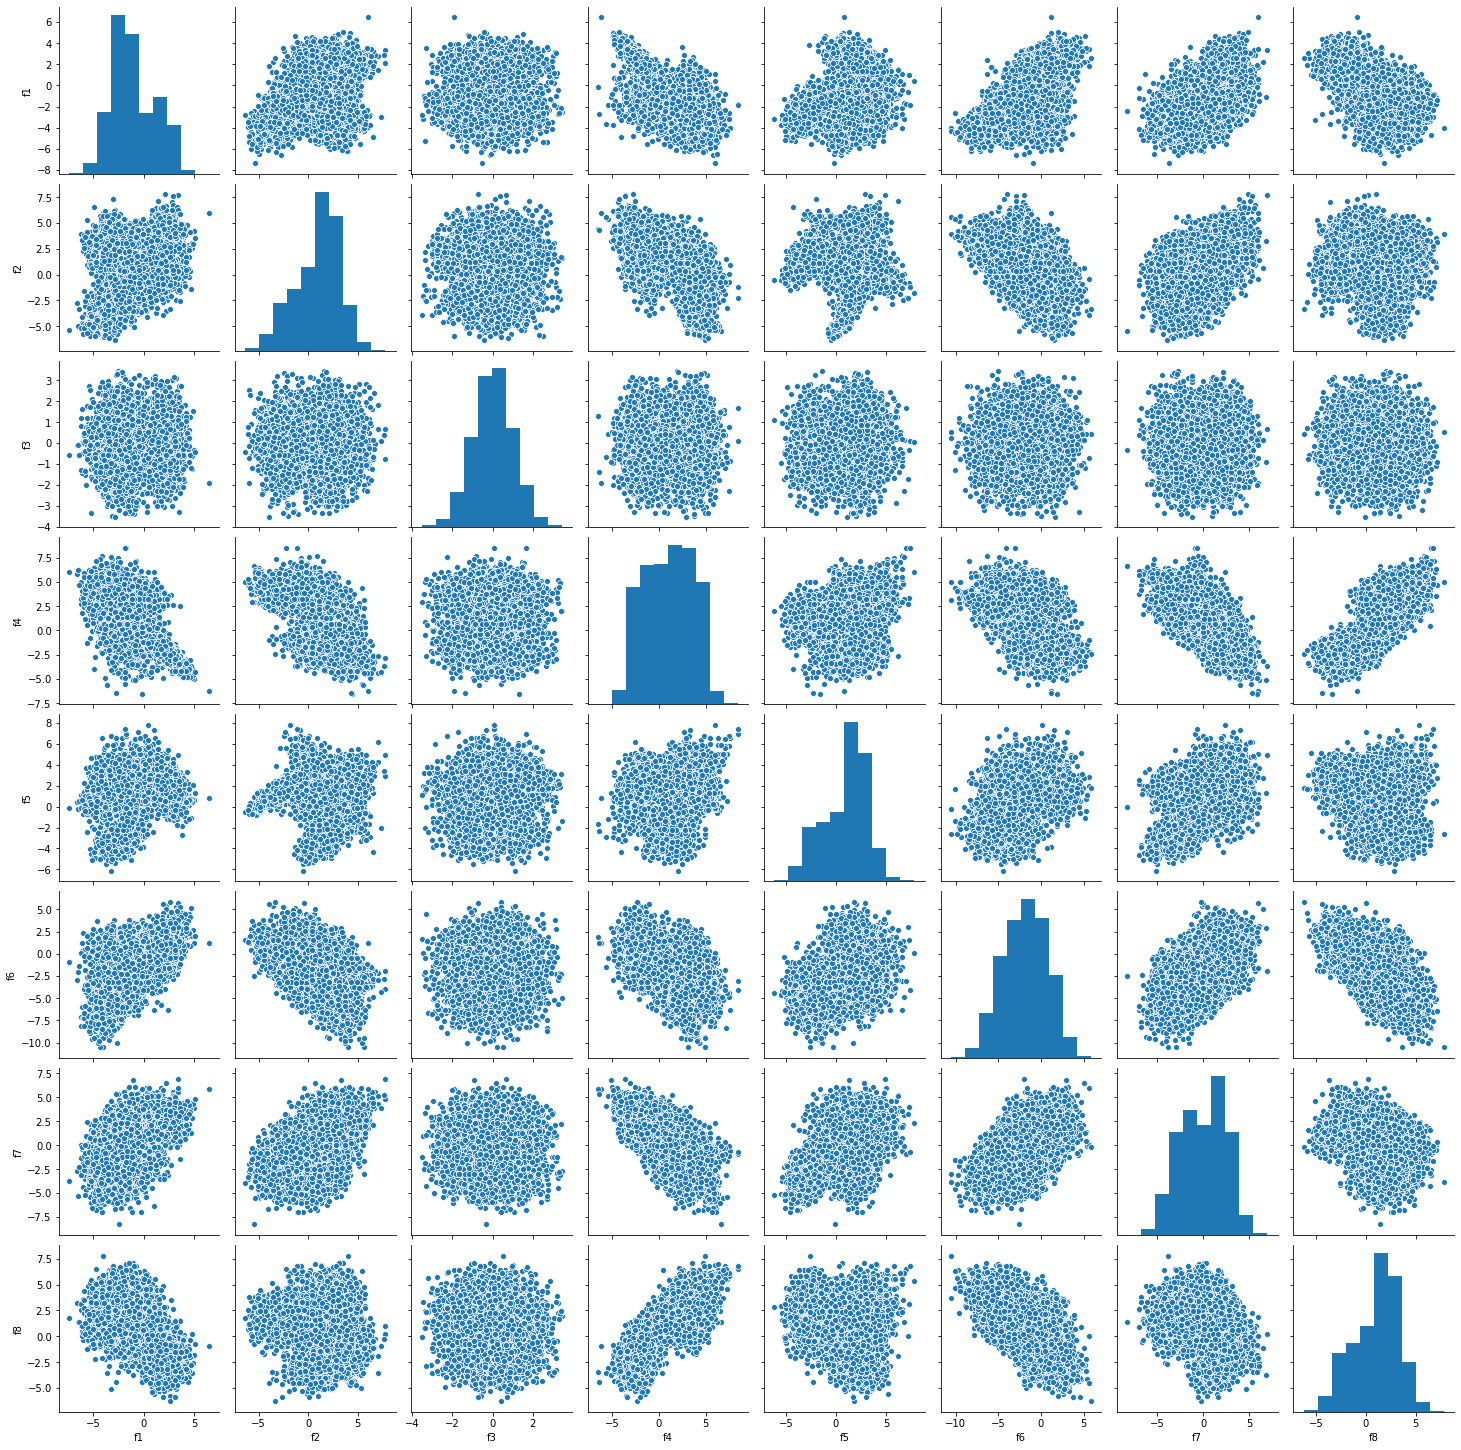

In [10]:
import seaborn
seaborn.pairplot(df)

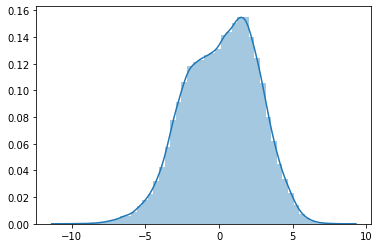

In [11]:
seaborn.distplot(df)

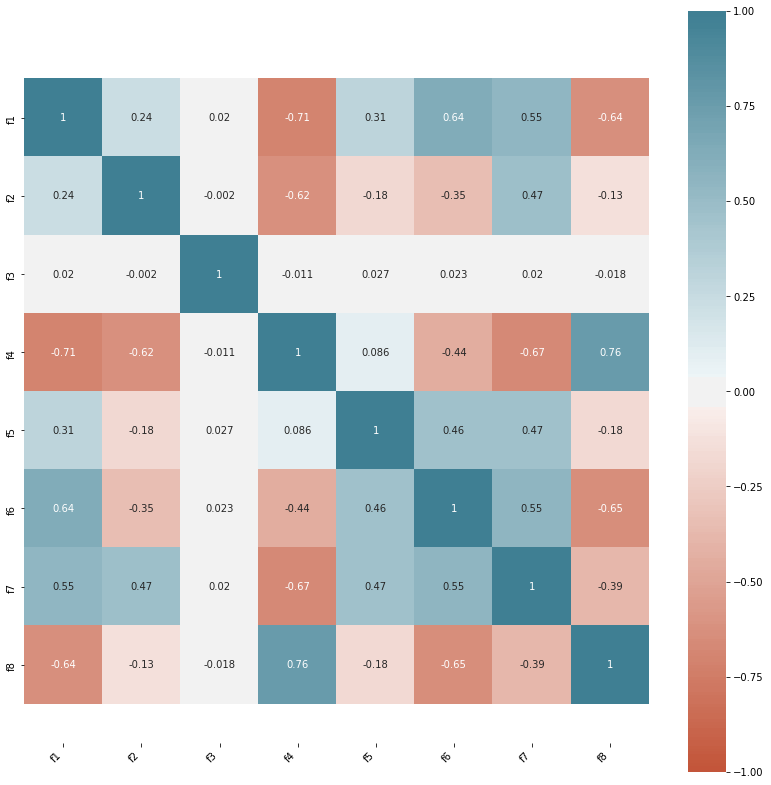

In [12]:
import seaborn
import matplotlib.pyplot as plt

corr = df.corr()
plt.figure(figsize=(14, 14))
ax = seaborn.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=seaborn.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim(len(corr)+0.5, -0.5);

In [13]:
new_df = df.drop(columns = ["f1","f2"])
new_df

,f3,f4,f5,f6,f7,f8
0,-1.571111,-2.233576,-2.272510,-0.478333,0.012107,-1.616344
1,-0.527495,-1.868875,2.921311,-1.783386,3.431662,-0.178611
2,-0.260753,1.768409,1.511900,-1.552257,1.182059,1.810524
3,-0.787970,-0.457057,3.388700,1.787840,4.294263,0.427934
4,-2.061152,-1.314058,-0.169329,-2.487230,2.144342,-0.733770
...,...,...,...,...,...,...
9995,-0.345061,0.629983,3.397411,-1.502344,3.098817,0.583324
9996,-1.152804,2.062795,-0.571202,-5.398310,-2.426969,2.455303
9997,0.536100,-1.266725,1.370092,-3.187447,1.306534,-0.254036
9998,0.848320,4.571744,3.057226,-4.759462,-2.439117,3.182019


In [14]:
from sklearn.ensemble import IsolationForest 
model = IsolationForest(n_estimators=50,random_state=42)
model.fit(new_df)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination='auto',
                max_features=1.0, max_samples='auto', n_estimators=50,
                n_jobs=None, random_state=42, verbose=0, warm_start=False)

In [15]:
new_df["anomaly"] = model.predict(new_df)

In [16]:
new_df

,f3,f4,f5,f6,f7,f8,anomaly
0,-1.571111,-2.233576,-2.272510,-0.478333,0.012107,-1.616344,1
1,-0.527495,-1.868875,2.921311,-1.783386,3.431662,-0.178611,1
2,-0.260753,1.768409,1.511900,-1.552257,1.182059,1.810524,1
3,-0.787970,-0.457057,3.388700,1.787840,4.294263,0.427934,1
4,-2.061152,-1.314058,-0.169329,-2.487230,2.144342,-0.733770,1
...,...,...,...,...,...,...,...
9995,-0.345061,0.629983,3.397411,-1.502344,3.098817,0.583324,1
9996,-1.152804,2.062795,-0.571202,-5.398310,-2.426969,2.455303,1
9997,0.536100,-1.266725,1.370092,-3.187447,1.306534,-0.254036,1
9998,0.848320,4.571744,3.057226,-4.759462,-2.439117,3.182019,1


In [17]:
anomaly=new_df.loc[new_df['anomaly']==-1]
anomaly_index=list(anomaly.index)

In [18]:
new_dataframe = new_df.drop(anomaly_index)
new_dataframe = new_dataframe.drop(["anomaly"],axis=1)

In [19]:
new_dataframe

,f3,f4,f5,f6,f7,f8
0,-1.571111,-2.233576,-2.272510,-0.478333,0.012107,-1.616344
1,-0.527495,-1.868875,2.921311,-1.783386,3.431662,-0.178611
2,-0.260753,1.768409,1.511900,-1.552257,1.182059,1.810524
3,-0.787970,-0.457057,3.388700,1.787840,4.294263,0.427934
4,-2.061152,-1.314058,-0.169329,-2.487230,2.144342,-0.733770
...,...,...,...,...,...,...
9994,-1.725345,-1.546591,-0.266177,-0.459824,2.234627,-1.280450
9995,-0.345061,0.629983,3.397411,-1.502344,3.098817,0.583324
9996,-1.152804,2.062795,-0.571202,-5.398310,-2.426969,2.455303
9997,0.536100,-1.266725,1.370092,-3.187447,1.306534,-0.254036


In [20]:
import pandas as pd
from sklearn import preprocessing

x = new_dataframe.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
new_dataframe = pd.DataFrame(x_scaled)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
param_dict = {
    'max_depth':range(2,20),
}

my_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf = GridSearchCV(my_clf,param_dict,cv=3, n_jobs = -1).fit(X_train,y_train)

print("Tuned: {}".format(clf.best_params_)) 
print("Mean of the cv scores is {:.6f}".format(clf.best_score_))
print("Train Score {:.6f}".format(clf.score(X_train,y_train)))
print("Test Score {:.6f}".format(clf.score(X_test,y_test)))
print("Seconds used for refitting the best model on the train dataset: {:.6f}".format(clf.refit_time_))

Tuned: {'max_depth': 10}
Mean of the cv scores is 0.973857
Train Score 0.992000
Test Score 0.980333
Seconds used for refitting the best model on the train dataset: 0.038423


Feature: 0, Score: 0.18208
Feature: 1, Score: 0.35942
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00043
Feature: 4, Score: 0.38993
Feature: 5, Score: 0.00033
Feature: 6, Score: 0.03984
Feature: 7, Score: 0.02797


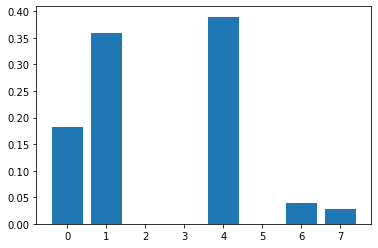

In [35]:
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot
#model = DecisionTreeRegressor()
# fit the model
#model.fit(X, y)
# get importance
importance = my_clf.fit(X,y).feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [37]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score
pred = clf.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1468
           1       0.98      0.98      0.98      1532

    accuracy                           0.98      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.98      0.98      0.98      3000



In [38]:
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

Precision = 0.9802826975764525
Recall = 0.9803884078798528
Accuracy = 0.9803333333333333
F1 Score = 0.9803267209256444


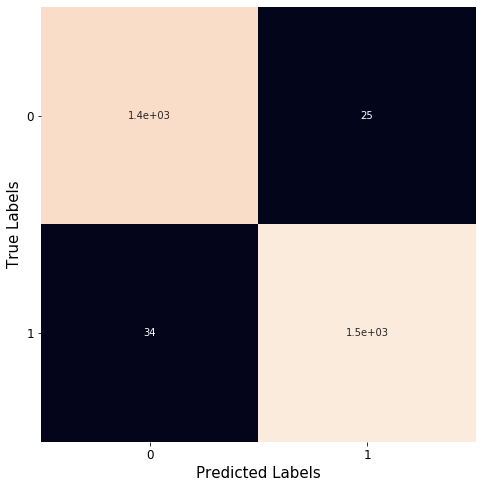

In [44]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 8))
ax =seaborn.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(y, fontsize = 12)
ax.yaxis.set_ticklabels(y, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [47]:
import xgboost as xgb

In [59]:
dmatrix_train = xgb.DMatrix(data=X_train, label=y_train)
dmatrix_test = xgb.DMatrix(data=X_test, label=y_test)

In [60]:
param = {'max_depth':3, 
         'eta':1, 
         'objective':'multi:softprob', 
         'num_class':3}

num_round = 5
model = xgb.train(param, dmatrix_train, num_round)

In [61]:
preds = model.predict(dmatrix_test)
preds[:10]

array([[6.6949287e-04, 9.9683541e-01, 2.4950881e-03],
       [9.2055631e-01, 7.5169593e-02, 4.2741285e-03],
       [9.4701064e-01, 4.7617741e-02, 5.3715822e-03],
       [9.6482590e-02, 8.9007705e-01, 1.3440281e-02],
       [3.9863061e-02, 9.4987983e-01, 1.0257102e-02],
       [9.6156418e-01, 3.4993373e-02, 3.4424723e-03],
       [9.9348336e-01, 4.6488331e-03, 1.8677397e-03],
       [6.4159423e-01, 3.4454915e-01, 1.3856624e-02],
       [9.9573487e-01, 2.3931661e-03, 1.8719725e-03],
       [9.8630643e-01, 1.0993802e-02, 2.6998054e-03]], dtype=float32)

In [62]:
import numpy as np
best_preds = np.asarray([np.argmax(line) for line in preds])

In [63]:

best_preds

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

In [64]:
print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))

Precision = 0.98094952102072
Recall = 0.9810553780920739
Accuracy = 0.981


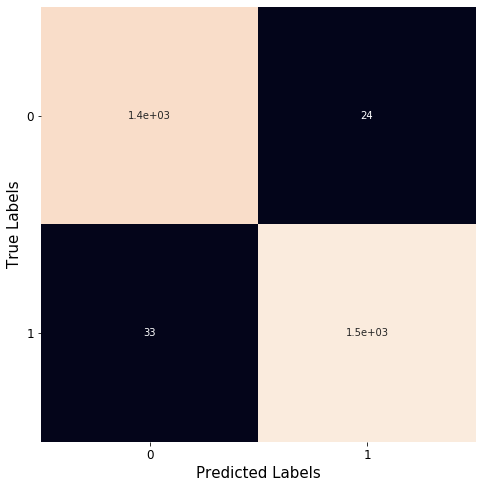

In [65]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_test, best_preds)
ax = seaborn.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(y, fontsize = 12)
ax.yaxis.set_ticklabels(y, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [68]:
param_dict = {
    'max_depth':range(3,5),
    'min_child_weight':range(1,3),
    'learning_rate': [0.001,0.01],
    'n_estimators': [10,190],
    'num_class' : [2,3]
    
}

xgc = XGBClassifier(booster='gbtree', learning_rate =0.01, n_estimators=200, max_depth=5,
min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
objective= 'multi:softprob', nthread=4, scale_pos_weight=1, seed=27)

clf = GridSearchCV(xgc,param_dict,cv=3, n_jobs = -1).fit(X_train,y_train)

print("Tuned: {}".format(clf.best_params_)) 
print("Mean of the cv scores is {:.6f}".format(clf.best_score_))
print("Train Score {:.6f}".format(clf.score(X_train,y_train)))
print("Test Score {:.6f}".format(clf.score(X_test,y_test)))
print("Seconds used for refitting the best model on the train dataset: {:.6f}".format(clf.refit_time_))

Tuned: {'learning_rate': 0.01, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 190, 'num_class': 2}
Mean of the cv scores is 0.977571
Train Score 0.980857
Test Score 0.981667
Seconds used for refitting the best model on the train dataset: 0.610836


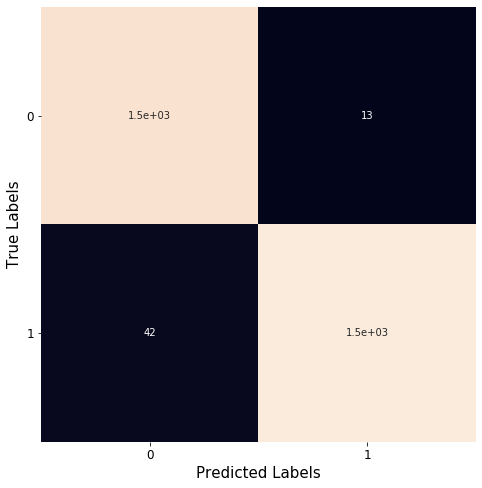

In [71]:
plt.figure(figsize=(12, 8))

xgb_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, xgb_pred)
ax = seaborn.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(y, fontsize = 12)
ax.yaxis.set_ticklabels(y, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [73]:
print("Precision = {}".format(precision_score(y_test, xgb_pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, xgb_pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, xgb_pred)))
print("F1 Score = {}".format(f1_score(y_test, xgb_pred,average='macro')))

Precision = 0.981647259922373
Recall = 0.9818646352829021
Accuracy = 0.9816666666666667
F1 Score = 0.9816641709566024


Although our both Xgboost and decision tree scores are pretty good, since all of its matrics are greater than decision tree's scores, Xgboost model should be used.